<a href="https://colab.research.google.com/github/anu-tressy/Projects/blob/main/Supply_Chain_Mangement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
This project embarks on a comprehensive data science journey, encompassing key stages such as exploratory data analysis (EDA), data processing, model development, evaluation, and visualization. By applying a diverse set of machine learning algorithms and evaluating their performance using a dedicated test dataset, our objective is to identify the most effective solution for optimizing supply quantities in each warehouse.

Throughout this endeavor, we will uncover valuable insights, trends, and potential areas for improvement. By adopting innovative approaches and strategies tailored to the unique challenges faced by the FMCG industry, we aim to develop a robust predictive model that empowers the company to make data-driven decisions and achieve operational excellence in its instant noodles business.

# LIBRARIES


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle as pkl

This code imports several Python libraries commonly used in data preprocessing and machine learning tasks. Here is a brief explanation of each library:
*   pandas is a library for data manipulation and analysis. It provides data structures like DataFrames and Series, which are similar to tables and columns in a database.
*   numpy is a library for numerical computing in Python. It provides data structures for numerical data and many mathematical functions.
*  seaborn is a library for statistical data visualization. It provides
functions for creating various types of plots, like scatter plots, line plots, bar plots, and heatmaps.
*  matplotlib is a library for creating visualizations in Python. It is commonly used for creating plots, charts, and graphs.
*  train_test_split is a function in the sklearn.model_selection module that is used to split a dataset into training and testing sets.
* StandardScaler is a class in the sklearn.preprocessing module that is used to standardize features by removing the mean and scaling to unit variance.
* mean_squared_error and r2_score are functions in the sklearn.metrics module that are used to evaluate the performance of regression models.
* LinearRegression is a class in the sklearn.linear_model module that implements a linear regression model.
* DecisionTreeRegressor is a class in the sklearn.tree module that implements a decision tree model for regression.
* RandomForestRegressor is a class in the sklearn.ensemble module that implements a random forest model for regression.
* SVR is a class in the sklearn.svm module that implements a support vector regression model.
* KNeighborsRegressor is a class in the sklearn.neighbors module that implements a k-nearest neighbors regression model.

By importing these libraries, we can use their functions and classes to preprocess the data, train regression models, and evaluate their performance.

# ACCESS THE DATA AND HAVE A SWIFT OVERVIEW

Pandas function that reads a CSV file and returns a DataFrame containing the data from the file.

In [92]:
train_df = pd.read_csv('supply_train.csv')
train_df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


# Information about DataFrame

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

There are a total of 25 columns in the dataset, including 8 categorical variables.The dataset has 16620 non-null values in total, with no missing values in most columns, except for the 'wh_est_year' column which has 8760 missing values, and the 'workers_num' column which has 667 missing values. These missing values will need to be handled before training a model on this dataset.

# Descriptive statistics for the numerical columns in the train_df DataFrame.

In [94]:
train_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


### Names of the columns in the train_df DataFrame

In [95]:
train_df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

# DATA CLEANING

### Drop irrelevant columns

In [96]:
cols_to_drop = ['Ware_house_ID','wh_est_year','Unnamed: 0','WH_Manager_ID']
train_df.drop(cols_to_drop,axis=1, inplace=True)

### Checking for missing values

In [97]:
train_df.isna().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     667
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    599
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

### Replacing missing values

In [98]:
train_df['approved_wh_govt_certificate'].fillna('N', inplace=True)

To replace the NaN values in the approved_wh_govt_certificate column, you can use the fillna() method of the pandas Series.We replace the NaN values with the string 'N'.

In [99]:
train_df['workers_num'].fillna(train_df['workers_num'].mean(), inplace=True)

Fill the null values with the mean of the column.

#  EXPLORATORY DATA ANALYSIS

### Get the list of categorical and numerical columns in training dataset:

In [100]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(exclude=['object']).columns
print(categorical_columns)
print(numerical_columns)

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')
Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')


### Visualize the distribution of each numerical column:

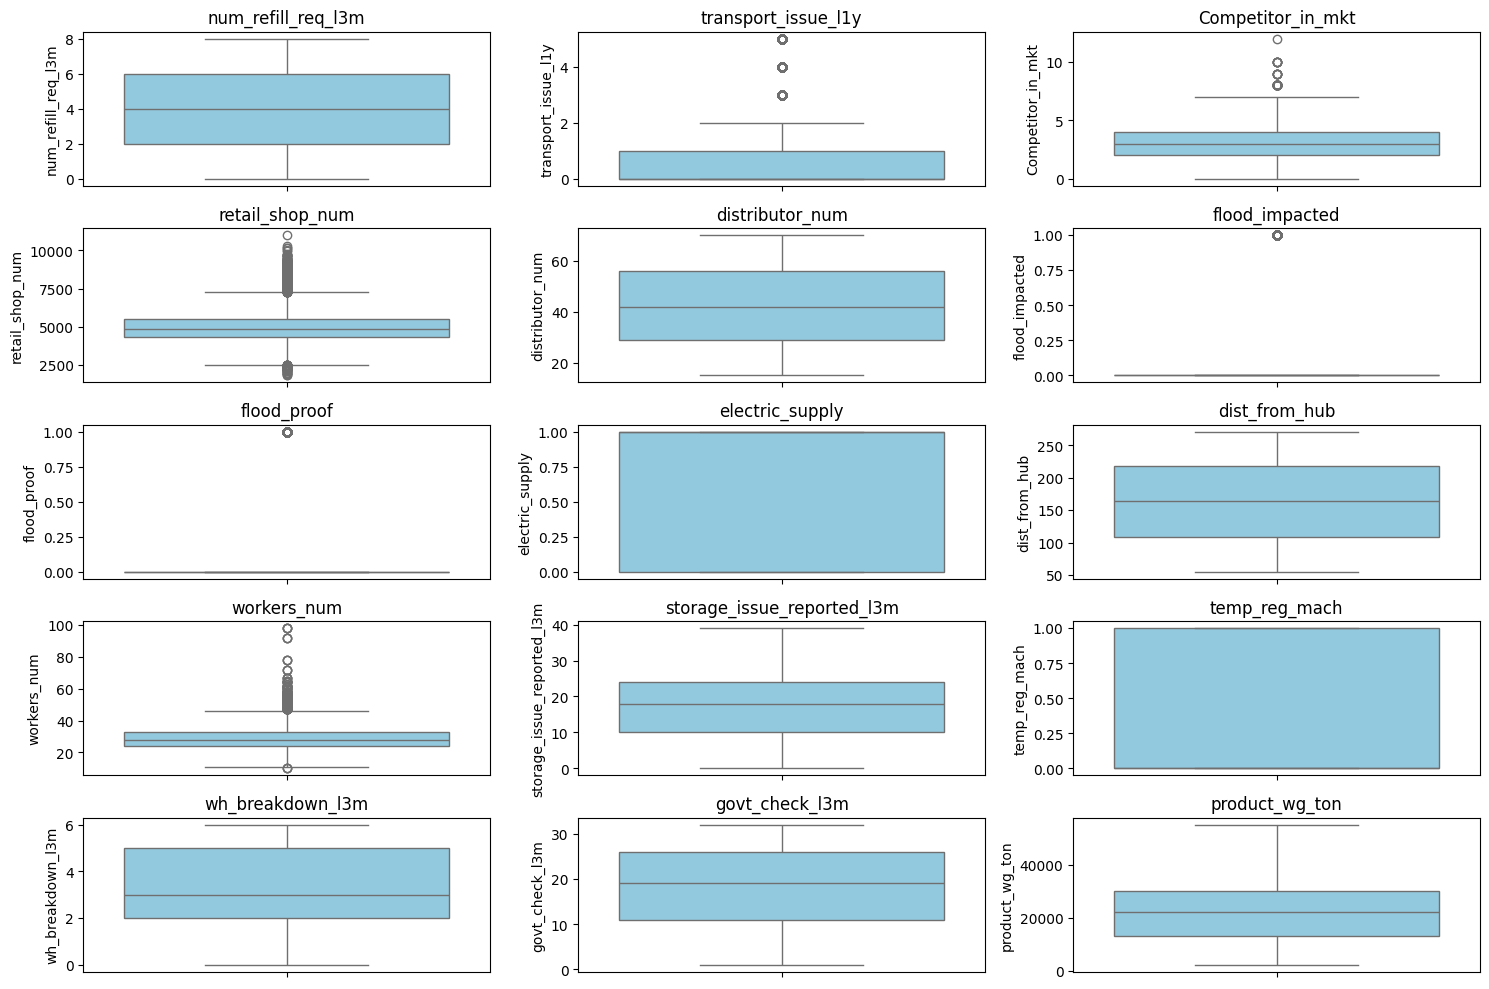

In [101]:
plt.figure(figsize=(15, 10))
num_plots = len(numerical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(train_df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

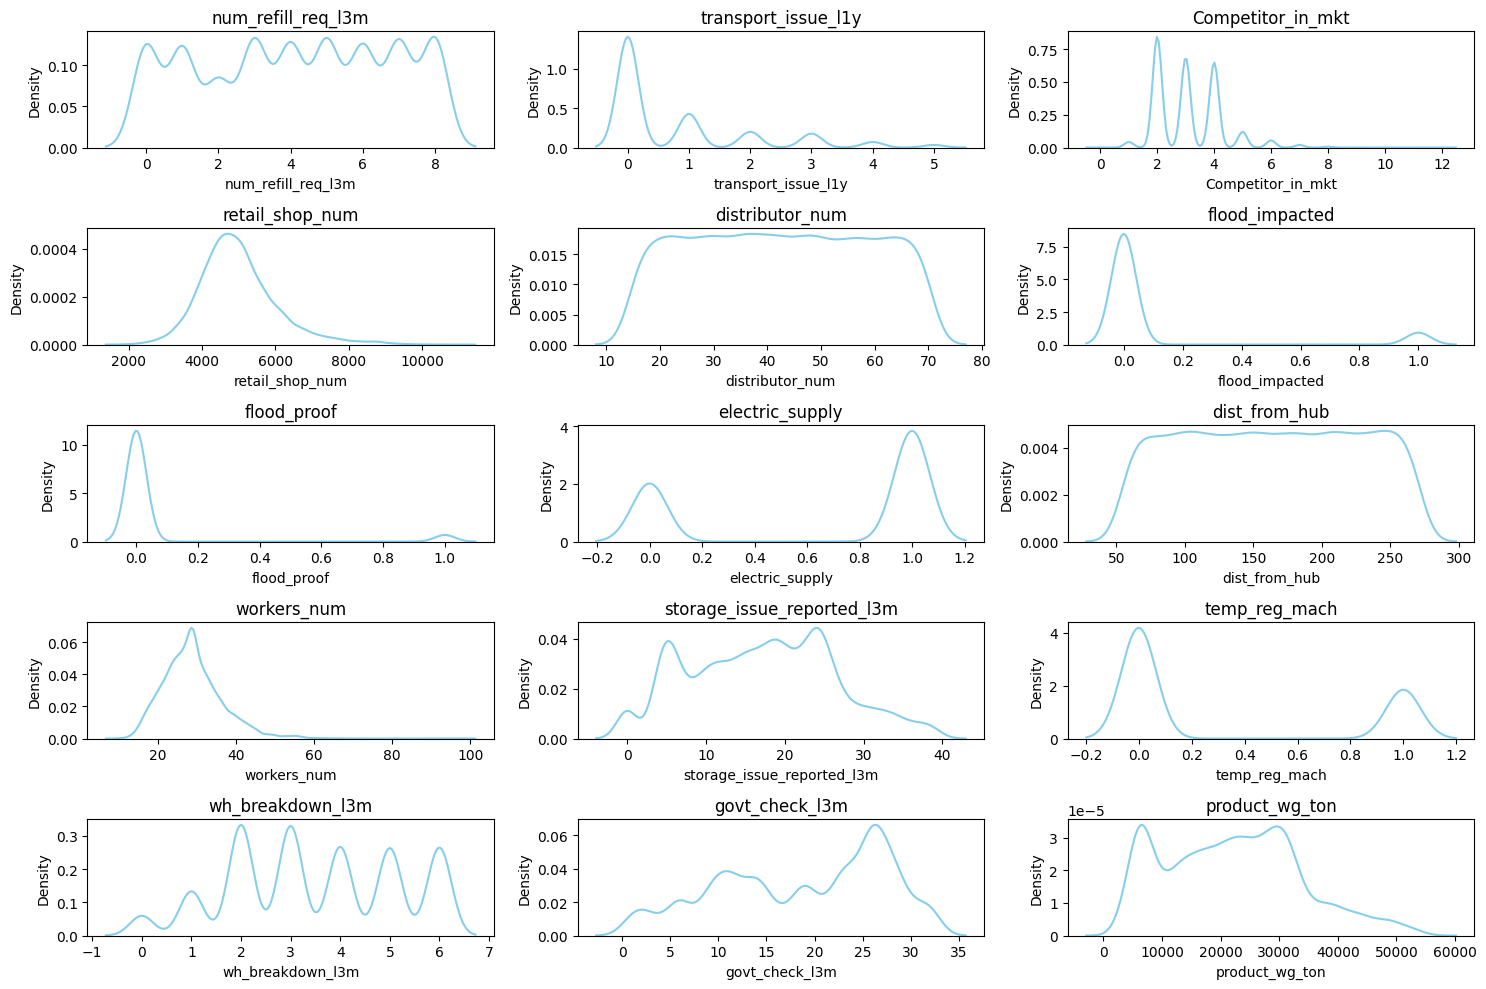

In [102]:
plt.figure(figsize=(15, 10))
num_plots = len(numerical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.kdeplot(train_df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


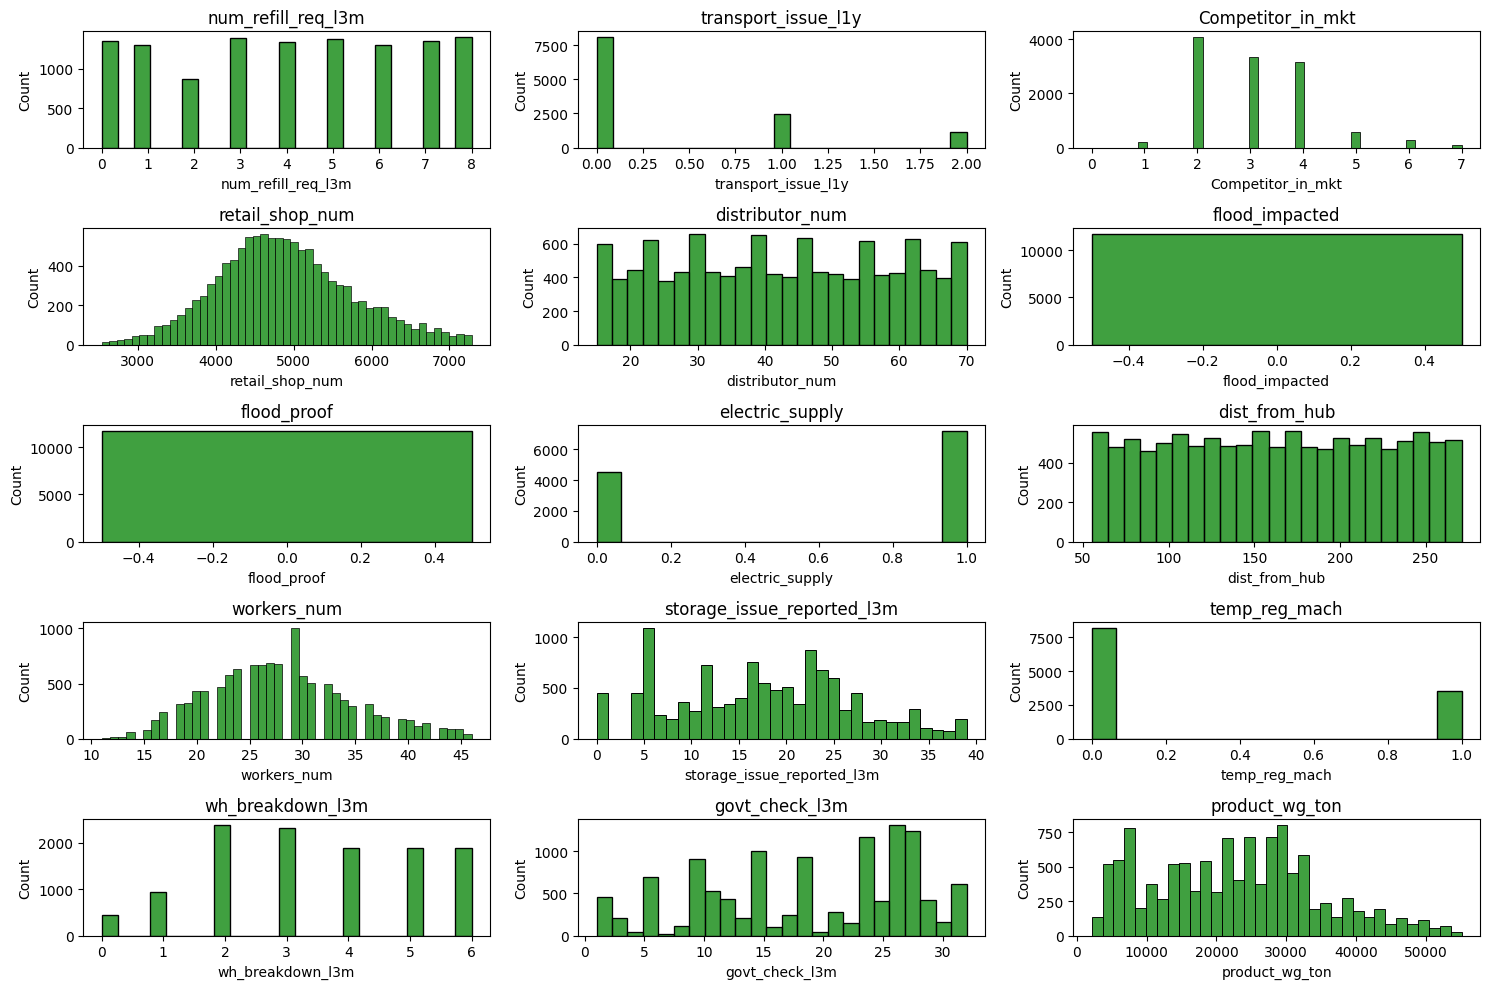

In [131]:
plt.figure(figsize=(15, 10))
num_plots = len(numerical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(train_df[col], color='green')
    plt.title(col)
plt.tight_layout()
plt.show()

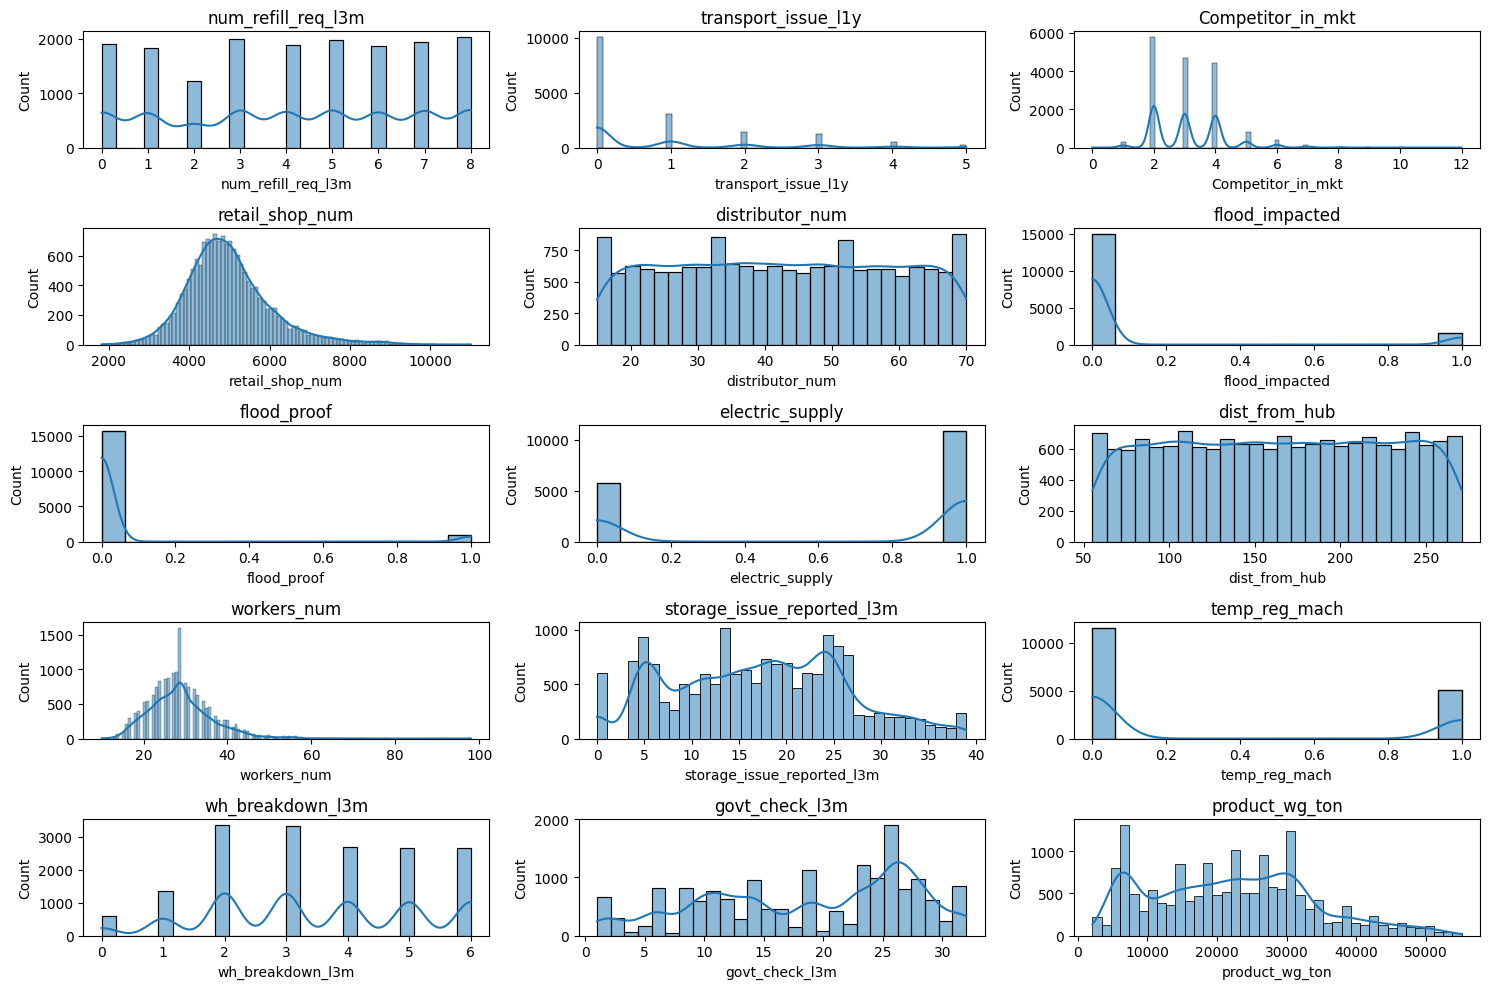

In [104]:
plt.figure(figsize=(15, 10))
num_plots = len(numerical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### Visualize the relationships between variables using a correlation heatmap:

<ipython-input-105-7d6cce836346>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


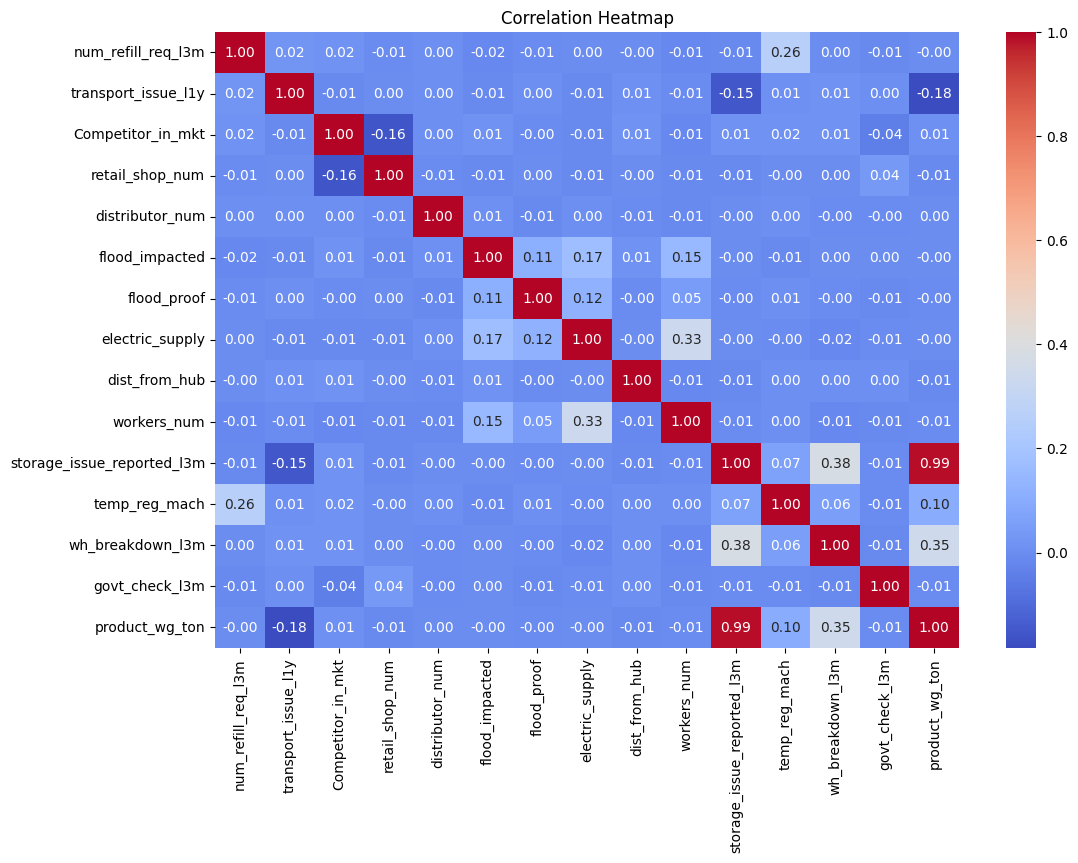

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Check the distribution of categorical variables:

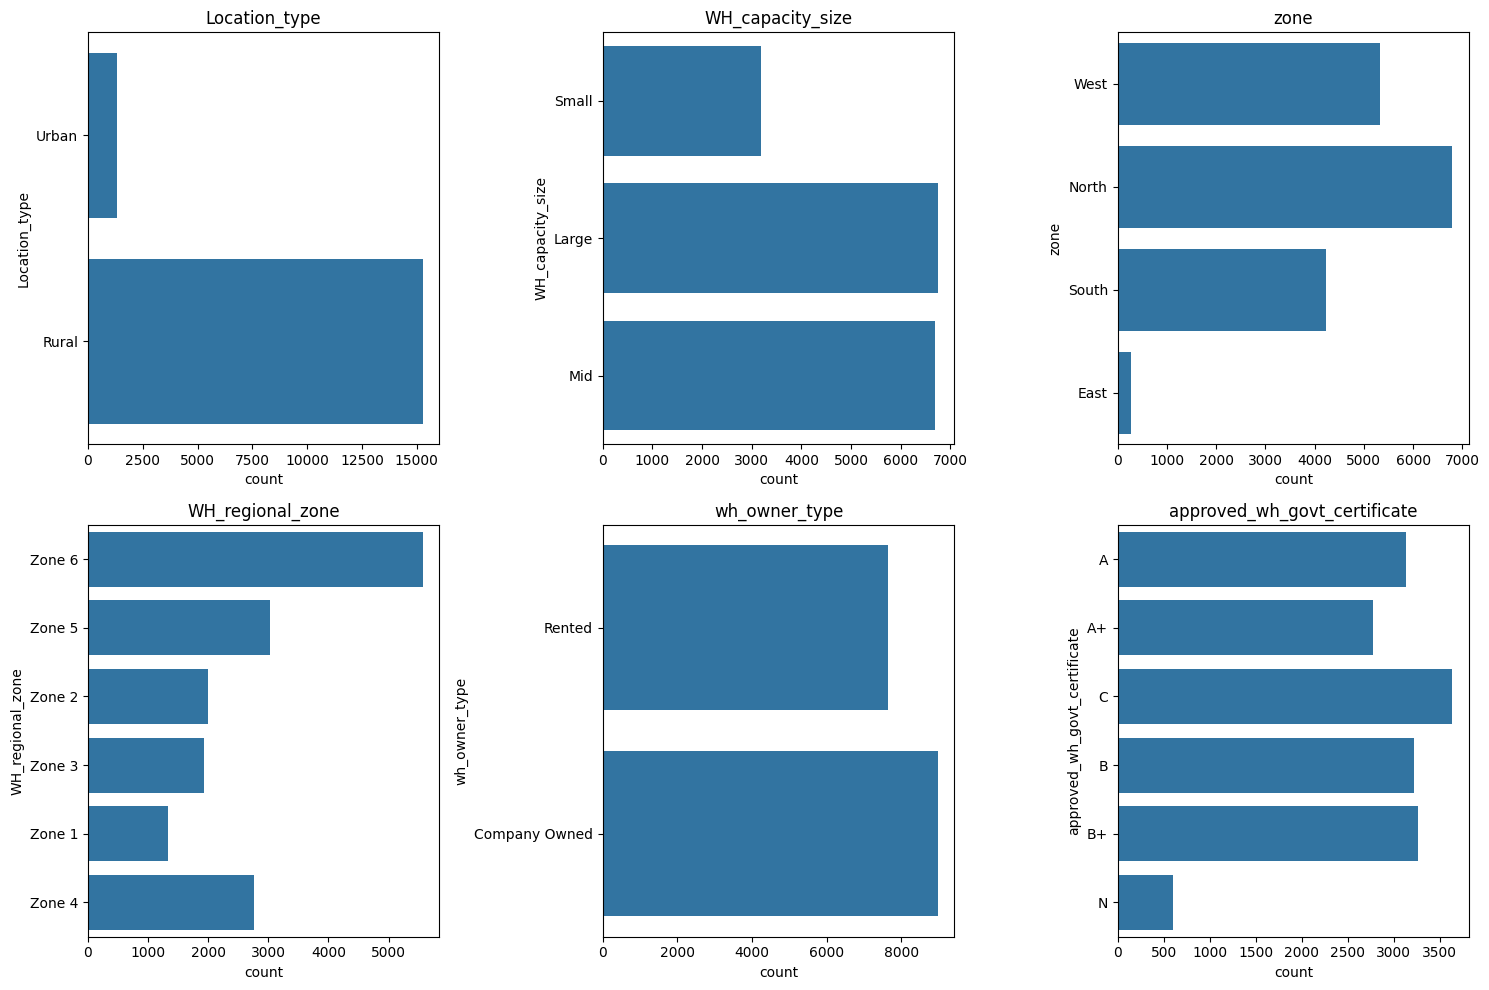

In [106]:
plt.figure(figsize=(15, 10))
num_plots = len(categorical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)  # Calculate number of rows
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(train_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Check for any outliers in the numerical columns:

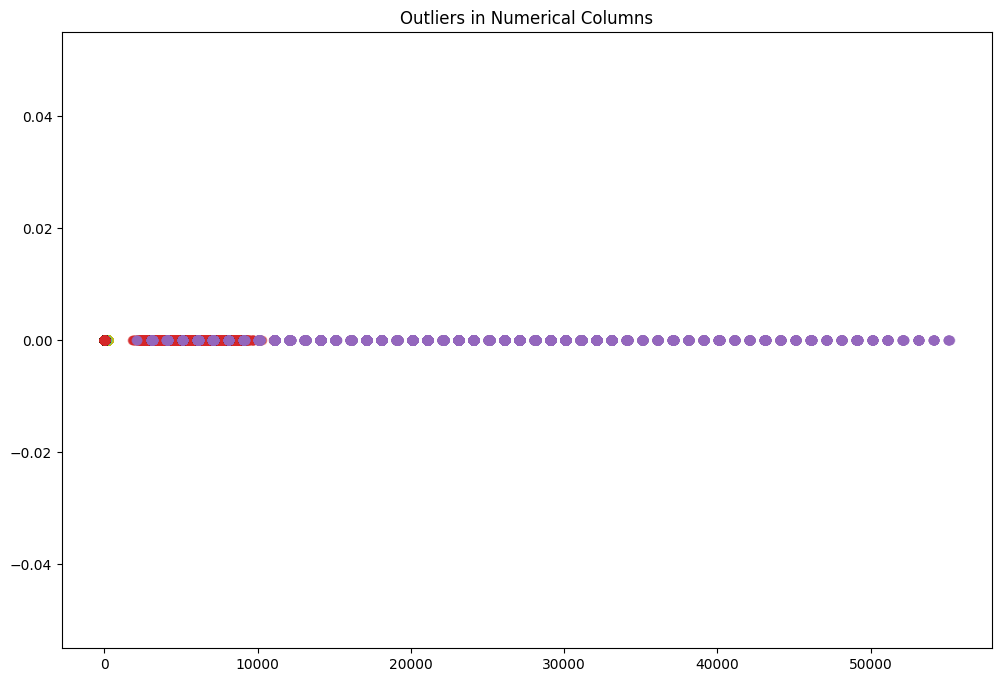

In [107]:
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    plt.scatter(train_df[col], np.zeros_like(train_df[col]), alpha=0.5)
plt.title('Outliers in Numerical Columns')
plt.show()

## Preprocess the outliers:

In [108]:
Q1 = train_df[numerical_columns].quantile(0.25)
Q3 = train_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (train_df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

Remove outliers based on the interquartile range (IQR)

# Encode categorical variables

In [109]:
train_df = pd.get_dummies(train_df, columns=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone','wh_owner_type', 'approved_wh_govt_certificate'], drop_first=True)

This code uses the pd.get_dummies function to create dummy variables for the categorical columns in the train_df DataFrame.

# Split the data into features and target variable

In [110]:
X = train_df.drop(['product_wg_ton'], axis=1)
y = train_df['product_wg_ton']

# Split data into train and testing sets

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting the X and y data into training and testing sets using the train_test_split function from the scikit-learn library.

# Standardize features

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applies StandardScaler to the training and testing data separately to standardize the features to have zero mean and unit variance.

# Initialize models

In [113]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}


A dictionary models with five keys, each corresponding to a different regression model.The dictionary allows for easy iteration and access to each of the models, which can be useful when training, evaluating, and comparing multiple models.

# Train and evaluate models

In [114]:
# The models dictionary and fits each model on the scaled training data, makes predictions on the scaled test data.
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
# Calculates the Root Mean Squared Error (RMSE) and R^2 score for each model using the mean_squared_error and r2_score functions from scikit-learn library.
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse}, R^2 = {r2}")

Linear Regression: RMSE = 1169.7354573795496, R^2 = 0.9899915630265542
Decision Tree: RMSE = 1402.868820197996, R^2 = 0.9856045556457734
Random Forest: RMSE = 1030.377023556414, R^2 = 0.9922342522236217
SVR: RMSE = 11623.794975443623, R^2 = 0.011704468576776872
KNN: RMSE = 7027.254346638125, R^2 = 0.6387878957838921


The Random Forest model has the lowest RMSE and the highest R^2 score, indicating that it is the best performing model among the five.These validation metrics can be used to compare the performance of the different models and select the best one for making predictions on new data.

# Creating a DataFrame containing Model name,RMSE and R^2 score.

In [115]:
# Create a list of dictionaries, where each dictionary contains the model name, RMSE, and R^2 score
df_data = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    df_data.append({'model': name, 'rmse': rmse, 'r2': r2})

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(df_data)

# Print the DataFrame
print(df)

               model          rmse        r2
0  Linear Regression   1169.735457  0.989992
1      Decision Tree   1419.354958  0.985264
2      Random Forest   1030.930366  0.992226
3                SVR  11623.794975  0.011704
4                KNN   7027.254347  0.638788


## Create bar plot for RMSE and R^2 score

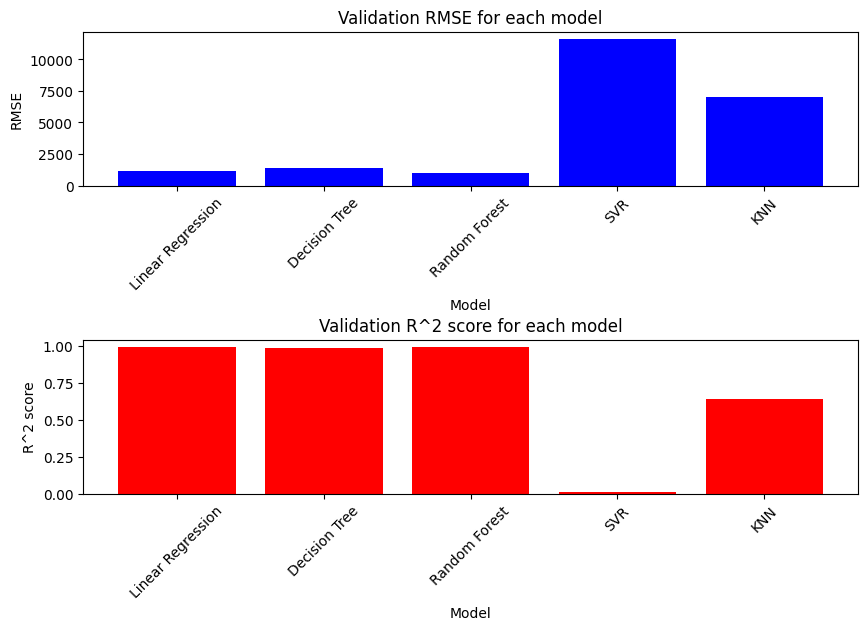

In [116]:
# Create a bar plot for RMSE
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(df['model'], df['rmse'], color='blue')
plt.title('Validation RMSE for each model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Create a bar plot for R^2 score
plt.subplot(2, 1, 2)
plt.bar(df['model'], df['r2'], color='red')
plt.title('Validation R^2 score for each model')
plt.xlabel('Model')
plt.ylabel('R^2 score')
plt.xticks(rotation=45)

# Add space between the plots
plt.subplots_adjust(hspace=1.0)

# Show the plots
plt.show()

# Save the trained Random Forest Model and scaler object using pickle

In [117]:
with open('model_and_scaler.pkl', 'wb') as f:
    pkl.dump((scaler, models['Random Forest']), f)

This is useful for saving the trained models and scaler object to be used later for making predictions on new data.

# Load the validation dataset and preprocessing

### Pandas method for reading CSV files and returning a DataFrame.

In [118]:
validation_df = pd.read_csv('supply_test.csv')

### Droping irrelevant columns

In [119]:
cols_to_drop = ['Ware_house_ID','wh_est_year','Unnamed: 0','WH_Manager_ID']
validation_df.drop(cols_to_drop,axis=1, inplace=True)

### Check for missing values

In [120]:
validation_df.isna().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     210
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    206
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

### Fill null values

In [121]:
validation_df['workers_num'].fillna(validation_df['workers_num'].mean(), inplace=True)

In [122]:
validation_df['approved_wh_govt_certificate'].fillna('N', inplace=True)

## Get the list of categorical and numerical columns in validation dataset

In [123]:
categorical_col = validation_df.select_dtypes(include=['object']).columns
numerical_col = validation_df.select_dtypes(exclude=['object']).columns
print(categorical_col)
print(numerical_col)

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')
Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')


## Remove outliers based on the interquartile range (IQR)

In [124]:
Q1 = train_df[numerical_col].quantile(0.25)
Q3 = train_df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
validation_df = validation_df[~((validation_df[numerical_col] < (Q1 - 1.5 * IQR)) | (validation_df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Encode the categorical columns

In [125]:
validation_df = pd.get_dummies(validation_df, columns=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone','wh_owner_type', 'approved_wh_govt_certificate'], drop_first=True)

Performs One-Hot-Encoding on the categorical columns of the validation_df DataFrame

# Load the Random Forest Model and scaler object using pickle



In [126]:
with open('model_and_scaler.pkl', 'rb') as f:
    scaler, random_forest_model = pkl.load(f)

Loads a pickled dictionary from the file "model_and_scaler.pkl" and extracts the Random Forest Model and scaler from it.

# Preprocess the validation dataset using the same scaler object as the training dataset

In [127]:
val_scaled = scaler.transform(validation_df.drop(['product_wg_ton'], axis=1))


Transformes the validation_df DataFrame by applying the same scaling used during training to all numerical columns except product_wg_ton. By transforming the validation data in the same way, we can ensure that the predictions made by the model are comparable to the training predictions.

# Make predictions on the validation dataset using Random Forest Model

In [128]:
val_preds = {}
val_preds['Random Forest'] = random_forest_model.predict(val_scaled)
print(val_preds)

{'Random Forest': array([31324.65,  6787.03, 25421.91, ..., 33967.46, 23883.87, 15289.95])}


This predicts values for the validation dataset using the Random Forest model and stores them in a dictionary called 'val_preds'. This allows for easy access to the model's predictions for evaluation or further analysis.

# Calculate evaluation metrics for Random Forest Model

In [129]:
val_rmse = np.sqrt(mean_squared_error(validation_df['product_wg_ton'], val_preds['Random Forest']))
val_r2 = r2_score(validation_df['product_wg_ton'], val_preds['Random Forest'])

Calculates the Root Mean Squared Error (RMSE) and R^2 score for the Random Forest model's predictions on the validation dataset. These metrics are essential for evaluating the model's performance in predicting the target variable ('product_wg_ton'). The RMSE measures the average deviation between predicted and actual values, while the R^2 score assesses how well the model fits the data. These insights help quantify the accuracy and explanatory power of the Random Forest model on unseen data, aiding in its assessment and potential refinement.

# Print evaluation metrics for Random Forest model

In [130]:
print("Validation metrics for Random Forest model:")
rmse = val_rmse
r2 = val_r2
print(f"RMSE = {rmse:.2f}, R^2 = {r2:.2f}")

Validation metrics for Random Forest model:
RMSE = 982.98, R^2 = 0.99


The Random Forest model demonstrates strong performance on the validation dataset, boasting an RMSE of 976.35, indicating relatively low prediction errors. The high R^2 score of 0.99 suggests that the model effectively explains 99% of the variance in the target variable, indicating a robust relationship.This suggests that the model is a good fit for the data and can be used for making accurate predictions on new, unseen data.